# Music Recommendation System (EDA)

#### We are using the following datasets --
<ul>
    <li>kaggle_songs.txt</li>
    <li>kaggle_users.txt</li>
    <li>kaggle_visible_evaluation_triplets.txt</li>
    <li>taste_profile_song_to_tracks.txt</li>
    <li>unique_tracks.txt</li>
</ul>

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
sns.set()
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

#### About the <u style="color:#00b3b3">kaggle_visible_evaluation_triplets.txt</u> Dataset

In [2]:
df_triplets = pd.read_csv('../input/innomatics-music-recom/kaggle_visible_evaluation_triplets.txt',
                         sep='\t', names=['user_id', 'song_id', 'freq'])
df_triplets.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [3]:
# Statistical description of the data

print('Shape of the Triplets dataset :',df_triplets.shape)
df_triplets.describe()

Shape of the Triplets dataset : (1450933, 3)


,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [4]:
# Total no. of unique values in each column

print('No. of unique user :',df_triplets['user_id'].unique().shape[0])
print('No. of unique song :',df_triplets['song_id'].unique().shape[0])
print('No. of unique frequency :',df_triplets['freq'].unique().shape[0])


No. of unique user : 110000
No. of unique song : 163206
No. of unique frequency : 299


#### About the <u style="color:#00b3b3">unique_tracks.txt</u> Dataset

In [5]:
df_tracks = pd.read_csv('../input/innomatics-music-recom/unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'])
df_tracks.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
print('Shape of the Unique_tracks dataset :',df_tracks.shape)

Shape of the Unique_tracks dataset : (1000000, 4)


#### As we can see, if we merge these two datasets, then it will contain all the necessary Features that we needed.

In [7]:
# Merging triplets.txt and unique_tracks.txt dataset

data = pd.merge(df_triplets, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
data.head()

,user_id,song_id,freq,track_id,artist_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [8]:
print('Shape of the Merged dataset :',data.shape)

Shape of the Merged dataset : (1450933, 6)


### Checking for Missing values and Duplicates

In [9]:
print('Duplicate rows in Merged data :',sum(data.duplicated()))

Duplicate rows in Merged data : 0


In [10]:
print('Null values in each column :')
data.isnull().sum()

Null values in each column :


user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
song           1
dtype: int64

#### We can see, there is one Missing value present in "song" column. As it's a very large dataset, so removing a row will not affect the whole dataset.<br> So we'll remove this.

In [11]:
# Dropping the row that contains missing value 
data.dropna(inplace=True)

data.isnull().sum()

user_id        0
song_id        0
freq           0
track_id       0
artist_name    0
song           0
dtype: int64

### Basic Statistics

In [12]:
# Number of Unique values per Column

print('Total Data points :' ,data.shape[0])
print('No. of unique Users :', data['user_id'].unique().shape[0])
print('No. of unique Songs :', data['song_id'].unique().shape[0])
print('No. of unique Tracks :', data['track_id'].unique().shape[0])
print('\nNo. of unique Artists :', data['artist_name'].unique().shape[0])
print('No. of unique Song Releases :', data['song'].unique().shape[0])

Total Data points : 1450932
No. of unique Users : 110000
No. of unique Songs : 163205
No. of unique Tracks : 163205

No. of unique Artists : 28360
No. of unique Song Releases : 137622


#### As the Total no. of unique songs & unique tracks are same and we can work with only 'song_id' too, so we can remove this 'track_id' column also.

In [13]:
data.drop(columns='track_id', axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   song         1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


In [15]:
data.describe()

,freq
count,1.450932e+06
mean,3.187151e+00
std,7.051666e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


### Analysis on Artists Popularity

In [16]:
df = data[['artist_name','song','freq']]

artist_pop = df.pivot_table(values=['freq'],index = 'artist_name' ,aggfunc = 'count')

artist_pop = artist_pop.sort_values(by='freq',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop.rename(columns = {'artist_name':'Artist', 'freq':'Total User'}, inplace = True)

artist_pop.head(10)

,Artist,Total User
0,Coldplay,12279
1,Kings Of Leon,8514
2,Florence + The Machine,8213
3,Justin Bieber,7669
4,Jack Johnson,6784
5,Train,6617
6,The Black Keys,6507
7,Eminem,6297
8,OneRepublic,6027
9,Muse,5849


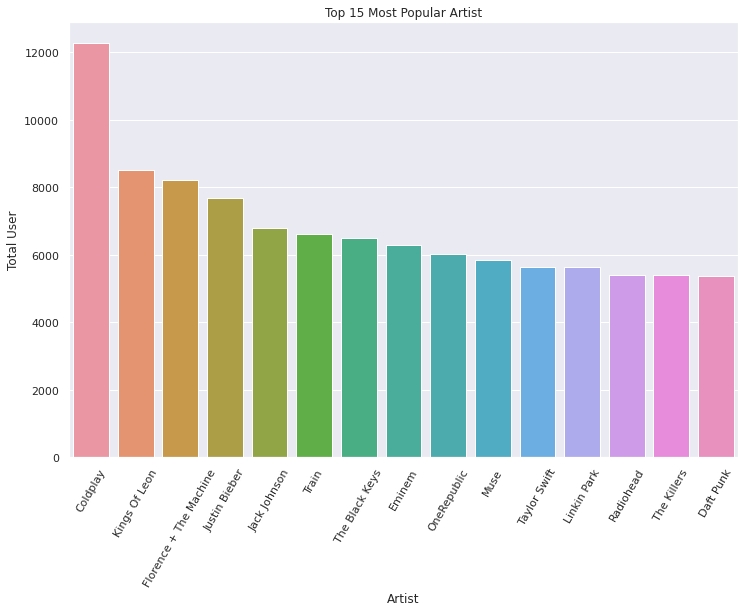

In [17]:
# Plotting Barplot for top 15 most popular artist

plt.figure(figsize=(12,8))

sns.barplot(x=artist_pop['Artist'][:15],y=artist_pop['Total User'][:15])

plt.title('Top 15 Most Popular Artist')

plt.xticks(rotation=60)

plt.show()

#### <p style="color:#204060"> These are the TOP-15 Popular Artist where 13675 number of Users Listened the Songs, released by "Coldplay",<br>So we can say, the songs of "Coldplay", are the Most Popular Songs.</p>


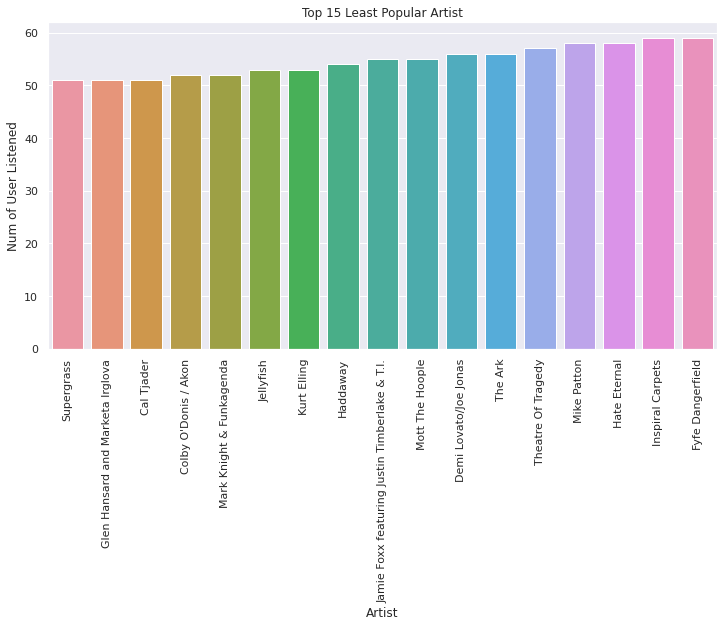

In [18]:
# Plotting barplot for top 15 most least popular Artist

plt.figure(figsize=(12,6))

artist_pop = artist_pop.sort_values(by='Total User',ascending=True)

least_pop = artist_pop[(artist_pop['Total User'] > 50) & (artist_pop['Total User'] < 100)]

least_pop = least_pop[:500:30]

sns.barplot(x=least_pop['Artist'], y=least_pop['Total User'])

plt.title('Top 15 Least Popular Artist')

plt.xlabel('Artist')

plt.ylabel('Num of User Listened')

plt.xticks(rotation=90)

plt.show()

In [19]:
# Number of Songs Released by Top 15 Most Popular Artist

artist_pop = artist_pop.sort_values(by='Total User',ascending=False)

artists = artist_pop['Artist'][:15]

song_count = []

for col in artists:
    
    x = data[data['artist_name'] == col].song.nunique()
    
    song_count.append(x)
    

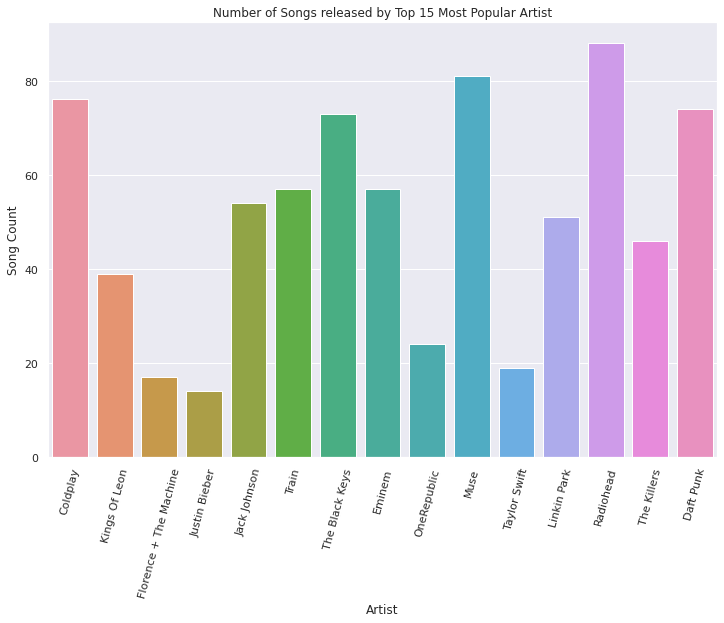

In [20]:
# Visualization

plt.figure(figsize=(12,8))

sns.barplot(x=artists,y=song_count)

plt.title('Number of Songs released by Top 15 Most Popular Artist')

plt.xlabel('Artist')

plt.ylabel('Song Count')

plt.xticks(rotation=75)

plt.show()

#### <p style="color:#204060">The Highest Number of Songs are Released by the Artist "Radiohead" whereas "Justin Bieber" has Released Least Number of Songs in Top-15.</p>

In [21]:
# Top-15 Artists who have Highest Song Frequency

artist_freq = data.groupby(['artist_name'],sort=True)['freq'].sum().nlargest(15)
artist_freq.head(10)

artist_name
Kings Of Leon             35857
Dwight Yoakam             35688
Björk                     35210
Coldplay                  32135
Florence + The Machine    28224
Justin Bieber             26133
Alliance Ethnik           21603
Train                     21356
OneRepublic               20802
Harmonia                  19461
Name: freq, dtype: int64

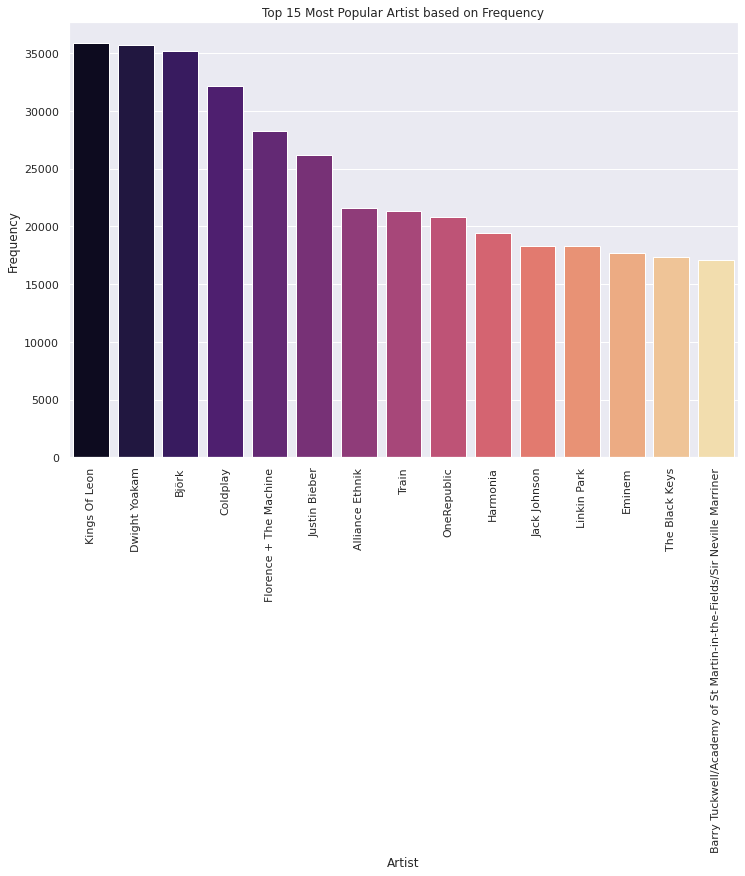

In [22]:
# Visualization

plt.figure(figsize=(12,8))

index = artist_freq.keys()
sns.barplot(x=index, y=artist_freq, palette='magma')

plt.title('Top 15 Most Popular Artist based on Frequency')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#### <p style="color:#204060">It's Clear that, Songs of "Kings Of Leon" has been Played 43775 number of times or, the highest number of times, <br>So "Kings Of Leon" is also a Most Popular Artist .</p> 

### Analysis on Songs Popularity

In [23]:
df = data[['artist_name','song','freq']]

song_pop = df.pivot_table(values=['freq'],index = 'song' ,aggfunc = 'count')

song_pop = song_pop.sort_values(by='freq',ascending=False)

song_pop = song_pop.reset_index()

song_pop.rename(columns = {'song':'Song', 'freq':'Total User'}, inplace = True)

song_pop.head(10)

,Song,Total User
0,Sehr kosmisch,5043
1,Undo,4483
2,You're The One,4270
3,Dog Days Are Over (Radio Edit),3780
4,Revelry,3672
5,Secrets,3456
6,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272
7,Hey_ Soul Sister,2791
8,Fireflies,2745
9,Tive Sim,2669


#### <p style="color:#204060">These are the TOP-10 Popular songs and 5043 different users have listened the song "Sehr kosmisch". So we can say, this song is the Most Popular Song.</p>

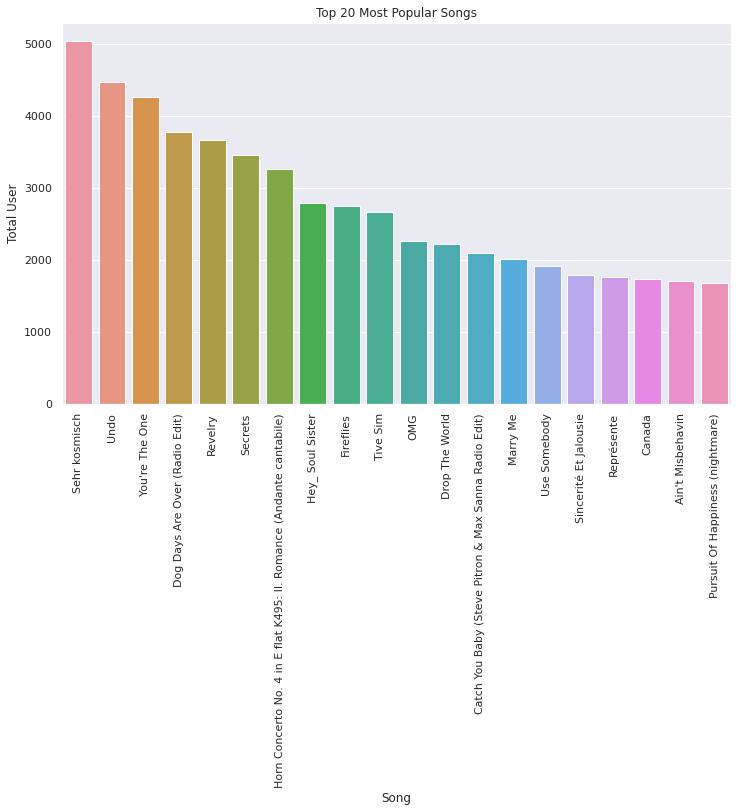

In [24]:
# Visualization

plt.figure(figsize=(12,7))

sns.barplot(x=song_pop['Song'][:20],y=song_pop['Total User'][:20])

plt.title('Top 20 Most Popular Songs')

plt.xticks(rotation=90)

plt.show()

In [25]:
# Least Popular Songs
song_pop.tail()

,Song,Total User
137617,Lobe Limbique,1
137618,Lobbyn om 5,1
137619,Loan Me A Dime,1
137620,Load off my mind,1
137621,þetta Gerist á Bestu Bæjum,1


#### Most Played Songs

In [26]:
song_count = data['song_id'].value_counts()
s_id = data['song_id'].value_counts().keys()

print('Song_id  ','\t','     Count','\n')
song_count.head(10)

Song_id   	      Count 



SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
SONYKOW12AB01849C9    3430
SOEGIYH12A6D4FC0E3    3272
SODJWHY12A8C142CCE    2791
SOLFXKT12AB017E3E0    2725
SOFLJQZ12A6D4FADA6    2668
Name: song_id, dtype: int64

In [27]:
song, p_count, artist = [], [], []

for i in range(20):
    count = data['freq'][data['song_id'] == s_id[i]].sum()
    artist.append(data['artist_name'][data['song_id'] == s_id[i]].value_counts().keys()[0])
    song.append(data['song'][data['song_id'] == s_id[i]].value_counts().keys()[0])
    p_count.append(count)
    
song_dict = {'Artist_name':artist, 'Song_name':song, 'Play_count':p_count}
top_songs = pd.DataFrame(song_dict)



top_songs.sort_values(by=['Play_count'],ascending=False,inplace=True)
top_songs.head(20)

,Artist_name,Song_name,Play_count
2,Dwight Yoakam,You're The One,35432
1,Björk,Undo,33179
4,Kings Of Leon,Revelry,24359
0,Harmonia,Sehr kosmisch,19454
6,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,17115
3,Florence + The Machine,Dog Days Are Over (Radio Edit),14279
5,OneRepublic,Secrets,12392
18,Sam Cooke,Ain't Misbehavin,11610
12,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,10515
17,Five Iron Frenzy,Canada,9921


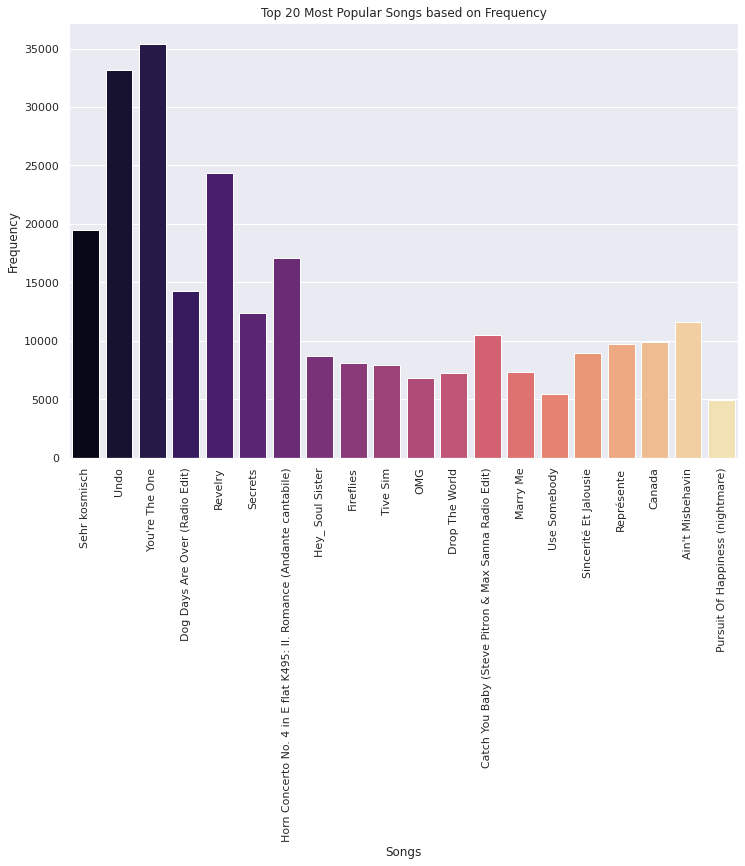

In [28]:
# Visualization

plt.figure(figsize=(12,8))

sns.barplot(x=song, y=p_count, palette='magma')

plt.title('Top 20 Most Popular Songs based on Frequency')
plt.xlabel('Songs')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

#### <p style="color:#204060">The Most Played Song is "You're the one" , that has been played 35432 times &<br>The song "OMG" has been played 6778 times , Least in Top-20</p>

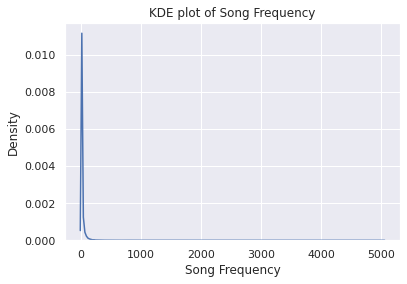

In [29]:
plt.title('KDE plot of Song Frequency')
plt.xlabel('Song Frequency')
sns.kdeplot(song_count)
plt.show()

### Number of Songs Listened per User

In [30]:
# Number of Songs Listened Per User

songs_per_user = data.pivot_table(values=['freq'],index = 'user_id' ,aggfunc = 'count')

songs_per_user = songs_per_user.reset_index()

songs_per_user.rename(columns = {'user_id':'Users', 'freq':'Total Songs'}, inplace=True)

songs_per_user.sort_values(by='Total Songs', ascending=False).head(10)

,Users,Total Songs
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
6694,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
96486,e08848e92427e9ef8add59a1264c484e1078d5a5,51
64941,9769ebffc543fa42b58daf6f52f8816abf5f408e,51
54171,7e27789eae69bc946c51833c0b833a49c58ed9ed,51
65684,992fea335363e87217e1b052fd7380b3fd7e35b4,51


<AxesSubplot:title={'center':'KDE Plot Songs Listened Per User'}, xlabel='Total Songs', ylabel='Density'>

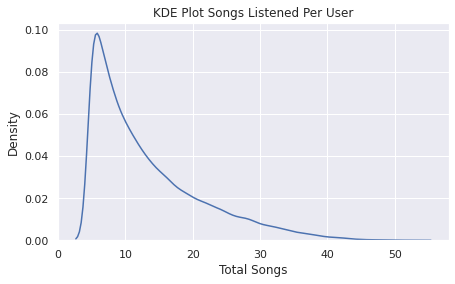

In [31]:
# KDE plot

plt.figure(figsize=(7,4))
plt.title('KDE Plot Songs Listened Per User')
sns.kdeplot(x = songs_per_user['Total Songs'])

#### <p style="color:#204060">It's basically showing the Distribution of Songs</p>

<AxesSubplot:xlabel='Total Songs'>

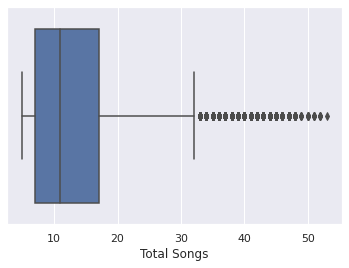

In [32]:
sns.boxplot(songs_per_user['Total Songs'])

#### <p style="color:#204060"> We can see, there are so many Outliers present, So now we will use "Log transformation", to handle these Outliers .</p>

<AxesSubplot:xlabel='Total Songs'>

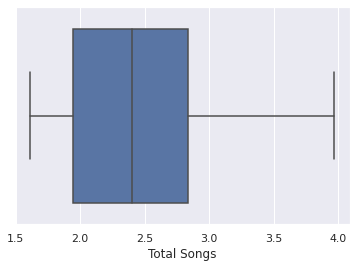

In [33]:
# Boxplot after Log transformation

sns.boxplot(np.log(songs_per_user['Total Songs']))

#### <p style="color:#204060"> Hence, using "Log transformation" , we're able to Remove all the Outliers .</p>

### Most Repeated Song

In [34]:
# Most repeated song played by a single user

data[data['freq'] == 923]

,user_id,song_id,freq,artist_name,song
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


###  Cumulative Sum of listen count of the Songs


In [35]:
# Cumulative sum of listen count of the songs

song_grouped = data.groupby(['song']).agg({'freq':'count'}).reset_index()
song_grouped.head()

,song,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [36]:
grouped_sum = song_grouped['freq'].sum()
song_grouped['Percentage'] = (song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','song'],ascending =[0,1])

,song,freq,Percentage
98812,Sehr kosmisch,5043,0.347570
125393,Undo,4483,0.308974
136066,You're The One,4270,0.294294
28716,Dog Days Are Over (Radio Edit),3780,0.260522
93984,Revelry,3672,0.253079
...,...,...,...
137608,Último Desejo,1,0.000069
137610,Über Grenzen Geh'n,1,0.000069
137612,Übers Geld (Skit),1,0.000069
137614,Üdvözöl A Pokol,1,0.000069


#### <p style="color:#204060">We can use this set of code to generate popularity based model so that it will give us top 10 or 50 songs for the every user this will be common for every user as these top songs are most popular and we can recommend them.</p>

#### Functions to get the <u>Unique Songs</u> listened by a user  &  the <u>Unique Users</u> listened a particular song

In [37]:
# This function will return all the unique songs listened by the user

def get_user_songs(string):
    user_data = data[data['user_id']==string]
    user_songs = list(user_data['song'].unique())

    return user_songs

In [38]:
# This function will return unique users of a particular song-id

def get_song_users(string):
    song_data = data[data['song_id']==string]
    song_users = set(song_data['user_id'].unique())

    return song_users
  


In [39]:
#Here we can get all the songs
def get_all_songs():
    all_songs= list(data['song'].unique())

    return all_songs

#### Examples

In [40]:
# get_all_songs()

In [41]:
get_user_songs('00007a02388c208ea7176479f6ae06f8224355b3')

['Convalescent',
 'Black & Gold',
 'Walk (Remastered LP Version)',
 'Bound For The Floor',
 'Spiderwebs',
 'We Own The Sky (Edit)',
 'Interstate Love Song (LP Version)',
 'Art School Girl (LP Version)',
 'Cottonmouth']

In [42]:
get_song_users('SONZGLW12A6D4FBBC1')

{'00007a02388c208ea7176479f6ae06f8224355b3',
 '00f0c9002f9f67f5fad9314884c85574a917847c',
 '054d8e6809fde82edf1066d3d5f940e812833110',
 '0bd4688c49ee9b7d1cafd23d6ef4fc7d846a3d06',
 '0ca7554ef2e5633a2b4d9b0187c79d4340323bd7',
 '0eaf11f5cd45e0524813927815d45be159c342b1',
 '0ed38016cf07dda79329123f65ea6c4a8e30559f',
 '10671c9e78fb4f96217e5b9132f3906093bb60d9',
 '17c53fe54056b6a1cca274ad8287dcf945103d58',
 '3127a45059d35fbbf8081bc8356b8fc081762052',
 '37eb8ac6bacba48e370e162d1f2e6bd3ab27da5e',
 '3ae067f7a1c568526fd43e39c11396de05926d47',
 '5875b797e4bb0852d4bf5d1ba09ee00096609d86',
 '6afeca3807e705dca766c78035d4ca003bdc1324',
 '806e83ca55325a72bc89652be3bac6afef30a518',
 '92e8ed700256ca5d365dbc4426d07e0cd64a5f2d',
 '97d10a6604ae3b3305432a1177913728a88576a1',
 'adc279e4bcf0629d54f7af6fd2ed297a64ef002f',
 'b0267d3ec2f5e510261a0813ddf7ef74d86f4aad',
 'badeebb5eb503ce8f5202bb2b82eb14bb4c74900',
 'cc34975ce09c70313eb078b22babed5bbe4a783f',
 'd16604a17e89c9961ee43172e05be35d749ecfd1',
 'e3736571

### Processing with a Sample of this Dataset

In [43]:
# Taking 5Lakh sample data from 14Lakh population data
data = data.head(100000)

In [44]:
# Creating a dictionary of songs listened by each user and its frequency, by grouping the user_ids

users = data.groupby('user_id').apply(lambda x: dict(zip(x['song'],x['freq']))).to_dict()
# users

In [45]:
# Create a data frame of this data

user_data = pd.DataFrame(users)
user_data.fillna(0,inplace=True)
user_data.head()

,0011d5f4fb02ff276763d385c3f2ded2b00ad94a,002511b392561fc1d426d875c386b356a6fc5702,002dfbc3c073b55a64a4abab34c0ca1f13897f1c,003998bc33cddeba02428a43391c6716e523c8f7,0042d2027dfa0340e31d2aa875c4be229730efb7,004433e6e1ad294af96331c00f8742f4fce99d50,0051b37d4665b4e6e2e1f048b671c19618c0a931,00587ee69421cb6abc50898714c23583f1f4e230,005aa4c4bc1dc74114b8bd6ffdca64c1d218474f,005b1fab38cdeb9d5bb97debcf73b44050994a3e,005cc5d858319f13f88228f62341e5a4270f8e75,005fdbe60a173e6f6f88731c7a77140161b33eac,006d3c79b9ed677280f8ddbc422d7b0fedd6d1fa,00712bd85c90cfa080b1cb863883f86ca55a83c3,0077bf2fd8c5a855c314f5c89f86d06eec01b34b,00803872fb1f0d39ecd256f4a247b7cbad24adbc,0083526744e75be758e05d74459b779bdf78b0f2,0093ea2ad5eebbfe7635a70909b7988d1b340a5a,00a1334b36850eb6abbdeae83ade7912284366c2,00a3d2ba148eab594ee67c2735993e7e6d681fc6,00a4807786626223483cf5543c2b01f9b0911503,00a80e20a8b269747ad5f511fb579ef9ec013941,00b22623c0f2eae5c65824da5f44e1b61759b946,00b3a4fd9e381e56445f64271ef48fb2d63dca07,00c06db043337cd60415ab3538d89360feafd96d,00e1b77ccd5fe2efcba73bc76516c824c1318bf5,00f7c493ee64884998ea98d9f5bed87bc4a0afcf,01047b99e00bb0743f66bb321bdd62e38fddb0a5,0104b2b5476a21e6692b8ac0c7758123a883b3cf,0107197bd5e2521cfa1cfde3faf9a6b39e8ba9e3,0118d4558afda9bdaa39ec3ea3dbe62f12604d4d,013779fe02370c559ebe9cdc6e8ce7eb4fdb02a7,015aa0d205801d1f4c9699123b58e05764b43558,0160c5e9f3c439d601d379ea0d284e3979b4fc19,016a06fea18e34248618fd415c6e0af8955aada0,016e11a1594f80f4c11a3accf4ba384195cb86a3,016ec728b1aaa73da066447563527a938283689d,01721f1f2ed5ffc4a64c15fe8fe4deedf0d2d62a,017711d03942d465ce084ea8a763342b557359e9,019609d3709369e5873379957dd2600f23ae6c06,0199d984f385a9710f34cbd0a08d9b1c21c826af,019fa6ae27d253c81cd1424bdd3cc091c26361dd,01a5b9fa7303ec57f7825fc8159042c553cdd5e9,01cde8de7f44d3ff63487a9f66106e870d80b0be,01f09bf443fa224900c3aba7d0206a53616506a1,01f19816ddcfa8c7454273d68d2050e5316a45fc,01f1a55601323e40cdffa2b7c5867e79f4977b52,01f2f08863356700757e00b7a223922d2ce7db9c,0220ae8f6fb97d4bfec8dc33ef2debd239188126,0229ae85e58e23655044364a513573a7ece070e8,023f647eff2a9e5674d0a204bcaf17d059066475,0260f0824ef6eadcae101f6063e93f769a2d0049,026b3e52b951d2f091b975cc10e4846e36a33baa,026db54b18e6e1c8273d82f2f6b1f1c81676d01b,02a8b5b227afc94e32cce9c7170fcfe2acdf7861,02ae9be19701cd4b41ee9722289709648cd54199,02b109b150bb6dba7a5e72efdda04a24df95dd3b,02b34491c559d7ad41cfbd23a74545418514724a,02b66e53cdde6e4dde64aa0a48d62eba6b816e69,02ba3b9d56ac7a6b971f638806062fb1e4eac237,02c0a2d8dbf0ffa70add9cde0c24e9c4f1da90c5,02c45b9977d4a5852d62834a8efb3863484df73a,02caaa0349f5d7aa54a6a262308a4ada43ad46d2,02cb6c2cb87a14facf7c687c623a6e497393b10c,02d272631bffc27a0f5a8fa83fd12e6cfaa5b0b9,02e2a7e86311a3fc7517ed3af77ffa2c9dac71ed,02e4af8e545c96c98359bc875a2db8f1e28bc42b,02e5bfba6931178d9b1c844bea3c05c41a6442fb,02f12def002af61911b56aac47045042ab94e7bc,02f9ae55fc5dd2a5911eb24853bf01c5b2537ad1,02fb27e82dd197562f3037161a8fe93886abd559,02fe4dba485633c71a27ffc78b240a81d9366e65,03045b996d8eb77c5543e76897eea9da669923db,030b5253106c6c11de2f4c6dc0ee27b48463b768,03223293bd532ea0eed6bde72948307f33b34655,0334e41c463f7b3aea8b7396001bb92e981ef599,034083a32f20742c75a3e83cd410968a51ef2245,0343daed405a48db8ae5b2d23ee9f38342e27ca8,034c9331e858baa2eb0bf6a8924b8431b7946dc4,0350f40aab31646bbf5b85b42ac2a80b0297bb9d,03550832815081d49da3f8d1b097ec2aa81e5757,0357ebbd4a5a5d253048767c801ed87cff7fa89e,03587c57662b250cb039dcbc97e79b79c706e2c6,035e8155cc99cc53d134fba293701855edbff6b6,0384930cd507b1f0450c88a99c940cd8dfe747cf,038f10a334074e3970609529620627708634ce03,0394e22c346855a475cb9d5a6fa051e9a40d007e,03ace7391031faa7d9b152f39fe78cb57e0f078c,03b382832f7eb3c4c8430ee986dd033c58be25b3,03b9807f06e6843382f1443ce56d9e32dd087e0c,03bc75dff5be4285236a9467b89f4efde4233a75,03be4cbe2d71991995cf45d49bf60e9dc30c86b6,03bf6eabf1141543f772a3d6fee5a9a932070972,03c6bfbc2119c9b98088b2d41f70d9f52f1e9229,03cea2c866e21c8390dc2bf21ec91628fe2717c8,03d91a72321c8c76cb101101ad1379056a2fff8c,03db1027e0b057eae1182d9eb965ea70af70afeb,03f6b77e710590cb397818

In [46]:
# custom function to create unique set of songs

def unique_items():
    unique_items_list = []
    
    for person in users.keys():
        for items in users[person]:
            unique_items_list.append(items)            
            
    s = set(unique_items_list)
    unique_items_list = list(s)
    
    return unique_items_list

In [47]:
# unique_items()

In [48]:
# custom function to create pearson correlation method 

def pearson_correlation(person1,person2):
    both_listened = {}
    for i in users[person1]:
        if i in users[person2]:
            both_listened[i] = 1

    no_of_songs = len(both_listened)
    if no_of_songs == 0:
        return 0

    person1_preferences_sum = sum([users[person1][i] for i in both_listened])
    person2_preferences_sum = sum([users[person2][i] for i in both_listened])

    # Sum up the squares of preferences of each user
    person1_square_preferences_sum = sum([pow(users[person1][i], 2) for i in both_listened])
    person2_square_preferences_sum = sum([pow(users[person2][i], 2) for i in both_listened])

    # Sum up the product value of both preferences for each song
    product_sum_of_both_users = sum([users[person1][i] * users[person2][i] for i in both_listened])

    # Calculate the pearson score
    numerator_value = product_sum_of_both_users - (person1_preferences_sum * person2_preferences_sum / no_of_songs)
    denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum, 2) / no_of_songs) * (person2_square_preferences_sum - pow(person2_preferences_sum, 2) / no_of_songs))
    
    if denominator_value == 0:
        return 0
    else:
        r = numerator_value / denominator_value
        return r

In [49]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37501 entries, First Dance to Introduction
Columns: 7526 entries, 0011d5f4fb02ff276763d385c3f2ded2b00ad94a to ffe98099df91d5ff4a9ab02f58bb9dc87b278cb2
dtypes: float64(7526)
memory usage: 2.1+ GB


In [50]:
# custom function to check most similar users

def most_similar_users(target_person,no_of_users):
    
    # Used list comprehension for finding pearson similarity between users
    scores = [(pearson_correlation(target_person,i),i) for i in users if i !=target_person]
    
    #sort the scores in descending order
    scores.sort(reverse=True)
    
    #return the scores between the target person & other persons
    return scores[0:no_of_users]

In [51]:
# function check by input one person name & returns the similarity score 

most_similar_users('0042d2027dfa0340e31d2aa875c4be229730efb7',10)

[(0, 'ffe98099df91d5ff4a9ab02f58bb9dc87b278cb2'),
 (0, 'ffe2811be1a471ea1d30fd646d815d272aef7d4d'),
 (0, 'ffdfc7f9864ee172c3488707969c90e7b1ac4dc7'),
 (0, 'ffdfbc60afdcdcb630d3b667ca3a083b09ed6212'),
 (0, 'ffd41f0f4c56e011d86a5005439f3468fd29d1d9'),
 (0, 'ffd000dee03972e48d6462118589fe7819e602f3'),
 (0, 'ffca2f5069c381b20171dc14404b2e5e1141692b'),
 (0, 'ffc683d098d818421f22363b150a19fd7d307764'),
 (0, 'ffc40a866e94948d8a223a3e98cc48a58d13a45d'),
 (0, 'ffb046d6935a3b5ad4673d45ae277630ca03ddc6')]

In [52]:
#custom function to filter the listened songs and  ignored songs of the target user

def target_songs_to_users(target_person):
    listened_songs = []
    unique_list = unique_items()
    
    for songs in users[target_person]:
        listened_songs.append(songs)

    s = set(unique_list)
    ignored_songs = list(s.difference(listened_songs))
    a = len(ignored_songs)
    
    if a == 0:
        return 0
    return ignored_songs, listened_songs

In [53]:
def recommendation_phase(person):
    # Gets recommendations for a person by using a weighted average of every other user's frequency
    totals = {}  # empty dictionary
    simSums = {} # empty dictionary
    for i in users.keys():
        # don't compare me to myself
        if i == person:
            print('Person Found')
            continue
        sim = pearson_correlation(person, i)

        # ignore scores of zero or lower
        if sim <= 0:
            continue
        for item in users[i]:
            # only score songs I haven't listened yet
            if item not in users[person]:
                # Similrity * score
                totals.setdefault(item, 0)
                totals[item] += users[i][item] * sim
                # sum of similarities
                simSums.setdefault(item, 0)
                simSums[item] += sim
                # Create the normalized list

    rankings = [(total / simSums[item], item) for item, total in totals.items()]
    rankings.sort(reverse=True)
    # returns the recommended songs
    recommendataions_list = [(recommend_item,score) for score, recommend_item in rankings]
    return recommendataions_list